In [4]:
from operator import truediv

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
telco_base_data = pd.read_csv('C:\\Users\\Amita\\OneDrive\\Documents\\GitHub\\Exploratory_Data_Analysis-EDA\\Data\\Churn_Modelling.csv')

## Univariate Analysis

In [6]:
telco_base_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
telco_base_data_new = telco_base_data[['Geography','Gender','Exited']]
telco_base_data_new.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


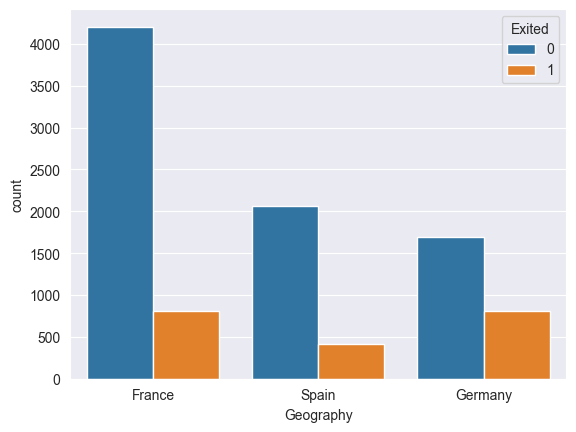

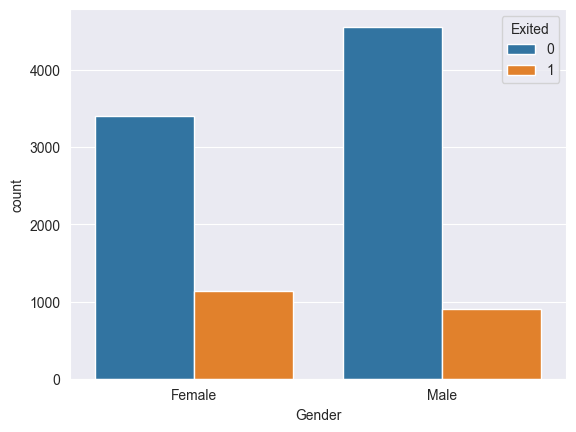

In [8]:
for i , preictor in enumerate(telco_base_data_new.drop(columns='Exited')):
    plt.figure()
    sns.countplot(data=telco_base_data_new ,x=preictor, hue= 'Exited')

## Bivaraite Analysis

<Axes: xlabel='Gender', ylabel='Count'>

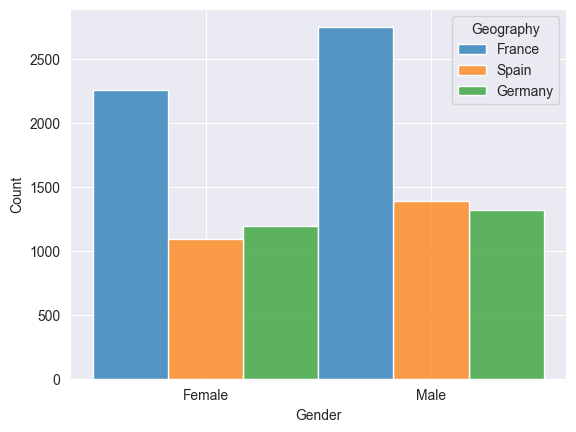

In [9]:
sns.histplot(data=telco_base_data_new , x='Gender',hue='Geography',stat='count',multiple='dodge')

In [12]:
telco_new_target1 = telco_base_data_new.loc[telco_base_data_new['Exited'] == 1] 
# churend coustomers    
telco_new_target1.head(5)

,Geography,Gender,Exited
0,France,Female,1
2,France,Female,1
5,Spain,Male,1
7,Germany,Female,1
16,Germany,Male,1


<Axes: xlabel='Gender', ylabel='Count'>

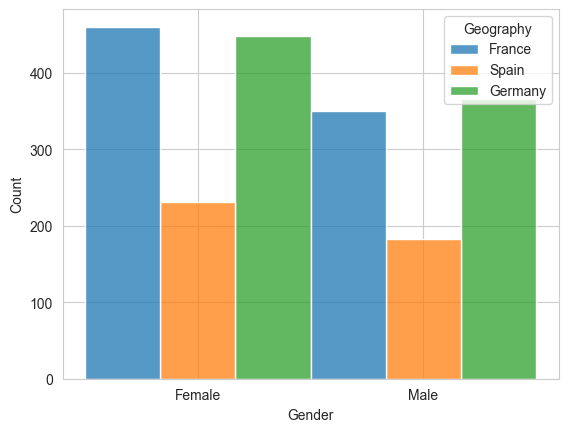

In [13]:
sns.histplot(data=telco_new_target1 , x='Gender',hue='Geography',stat='count',multiple='dodge')



## Numerical Analysis

correlation:  it ranges from -1 to +1 
* +1 --> positive correlation
* -1 --> negative correlation
* 0 --> no correlation

In [19]:
telco_base_data.corr(method='pearson', min_periods=1, numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

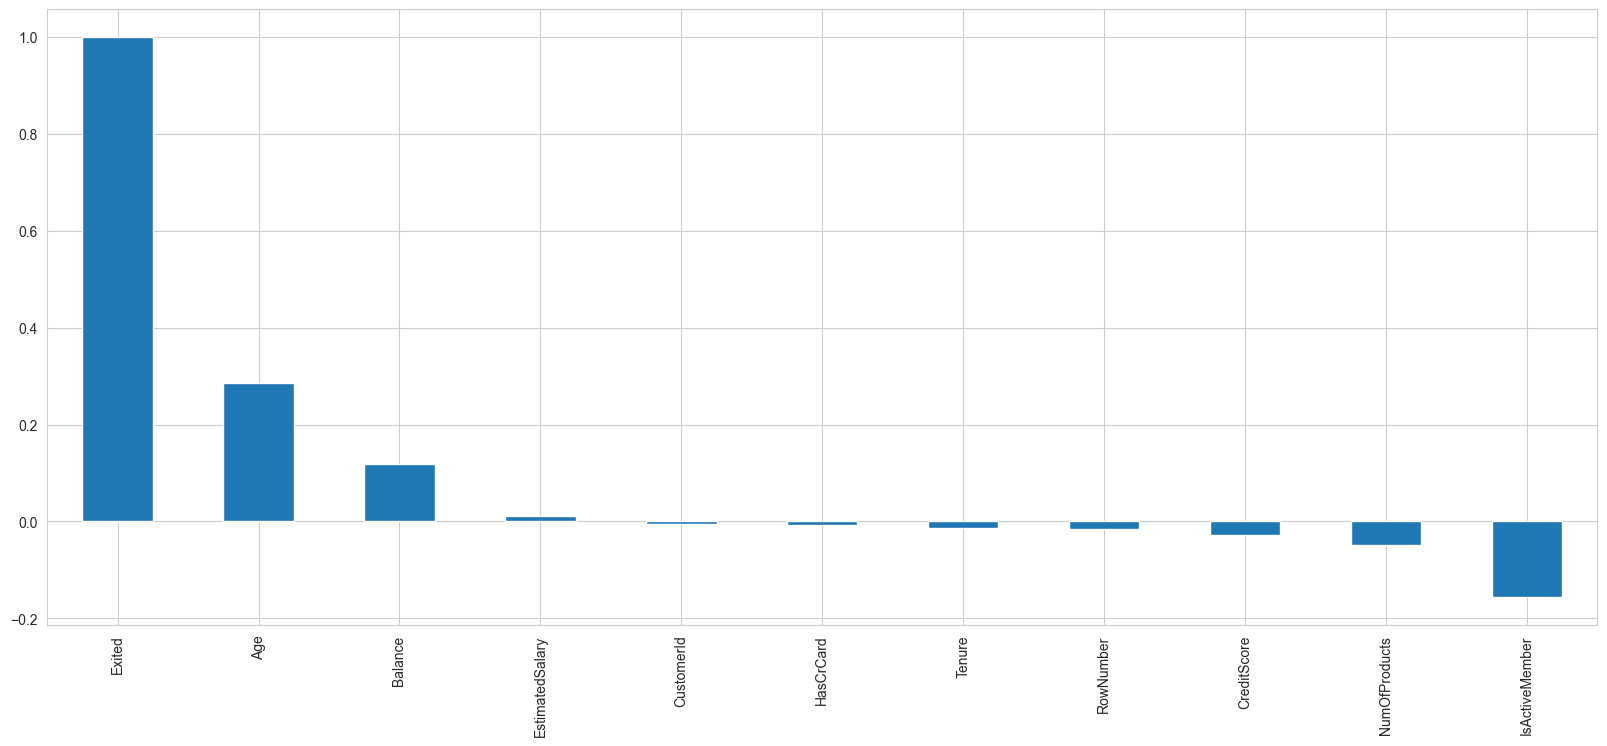

In [21]:
plt.figure(figsize=(20,8))
telco_base_data.corr(method='pearson', min_periods=1, numeric_only=True)['Exited'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

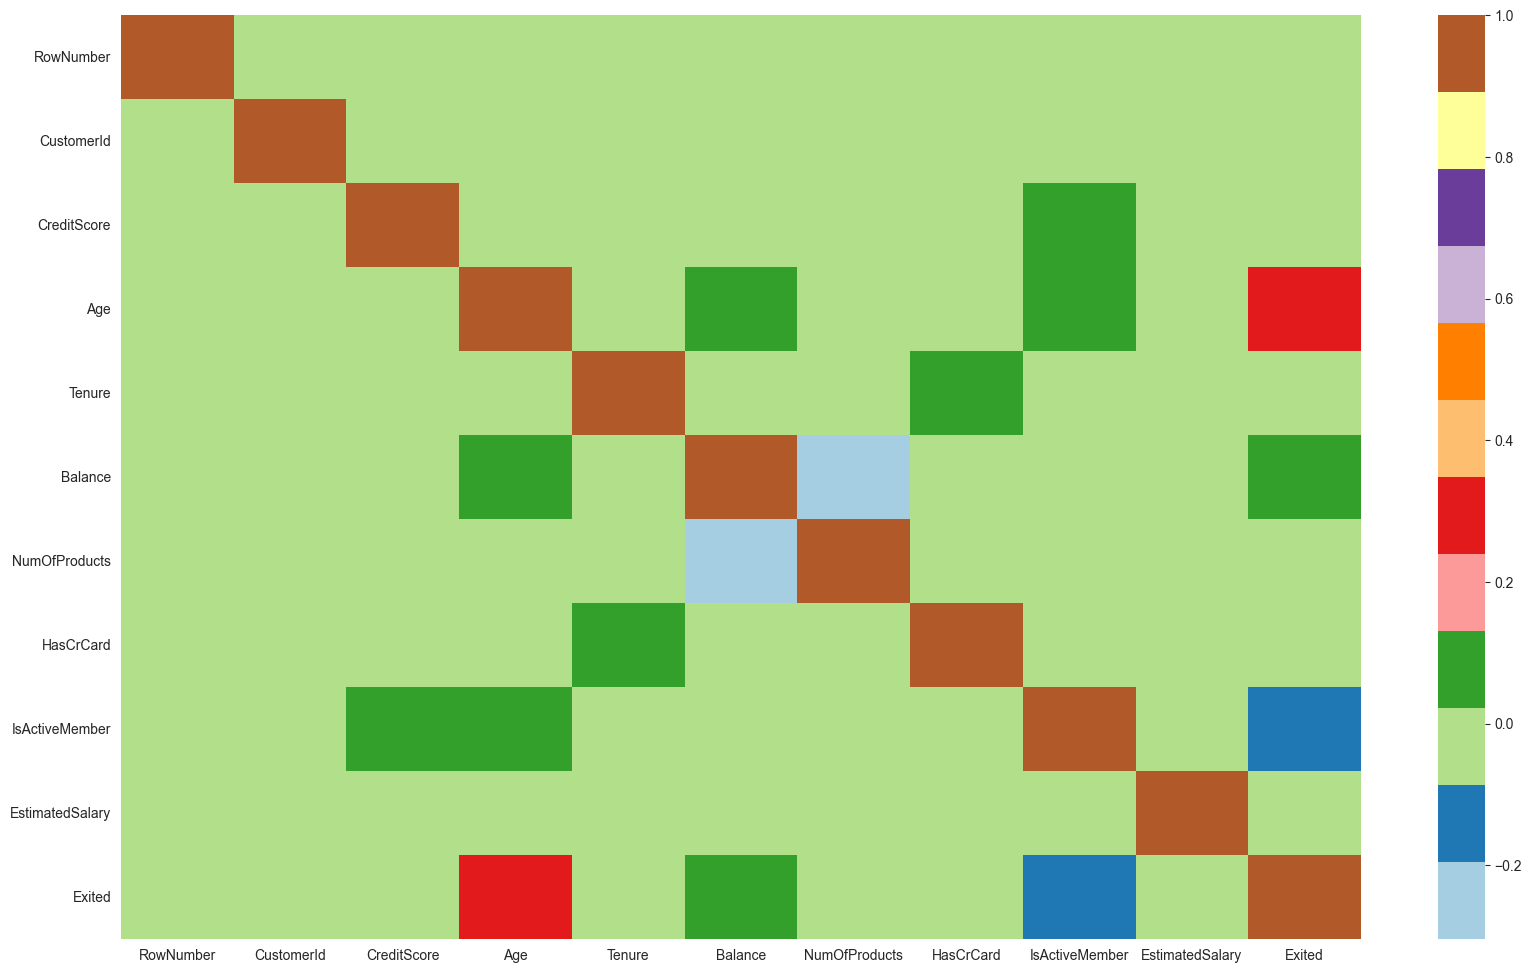

In [22]:
plt.figure(figsize=(20,12))
sns.heatmap(telco_base_data.corr(method='pearson', min_periods=1, numeric_only=True),cmap='Paired')

<Axes: xlabel='Age'>

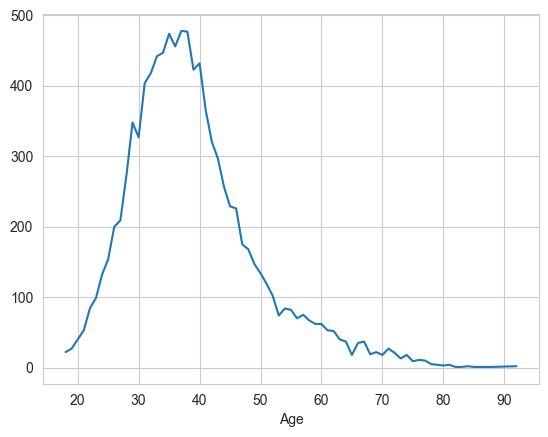

In [24]:
telco_base_data['Age'].value_counts().sort_index(ascending=True).plot()

In [ ]:
telco_base_data_1 = telco_base_data.loc